In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sklearn

SR = 22050
HOP_LEN = 256
FRAME_LEN = 512

audioPath = "./dataset/blues/blues.00000.wav"
x, sr = librosa.load(audioPath, sr=SR)

In [6]:
import IPython
IPython.display.Audio(x, rate=sr)

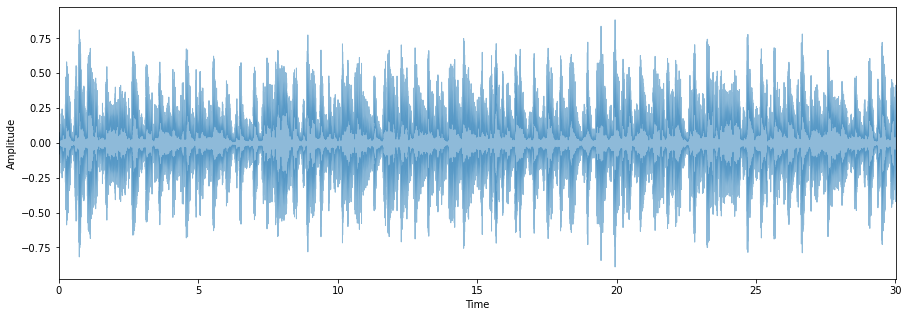

In [42]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(x, sr=sr, alpha=0.5)
plt.ylabel("Amplitude")
plt.show()

RMSE - Mean: 0.12654337286949158, Std: 0.06144455820322037


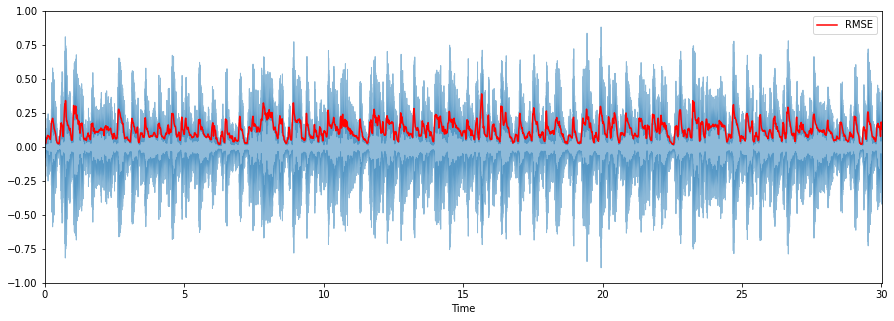

In [3]:
# Time Domain Features

# Root Mean Square Energy
rms = librosa.feature.rms(x, frame_length=FRAME_LEN, hop_length=HOP_LEN)[0]

frames = range(len(rms))
t = librosa.frames_to_time(frames, sr=sr, hop_length=HOP_LEN)
print(f"RMSE - Mean: {np.mean(rms)}, Std: {np.std(rms)}")
plt.figure(figsize=(15,5))
librosa.display.waveplot(x, sr=sr, alpha=0.5)
plt.plot(t, rms, color="r", label="RMSE")
plt.ylim((-1,1))
plt.legend()
plt.show()

Number ob zero-crossings: 21


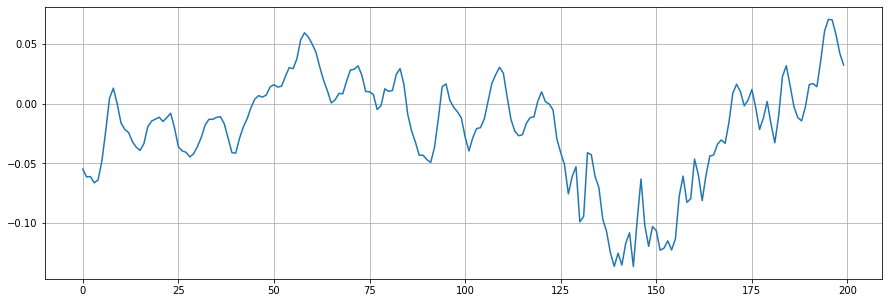

In [44]:
# Zero Crossing Rate

start = 1000
end = 1200
zero_cross_rate = librosa.zero_crossings(x[start:end], pad=False)
print(f"Number ob zero-crossings: {sum(zero_cross_rate)}")

plt.figure(figsize=(15,5))
plt.plot(x[start:end])
plt.grid()
plt.show()

In [60]:
# Tempo

tempo = librosa.beat.tempo(x, sr=SR, hop_length=HOP_LEN)
print(f"Tempo: {tempo}")

Tempo: [126.04801829]


In [87]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Spectral Centroid - Mean: 1657.7684788885947, Std: 383.30289375141786


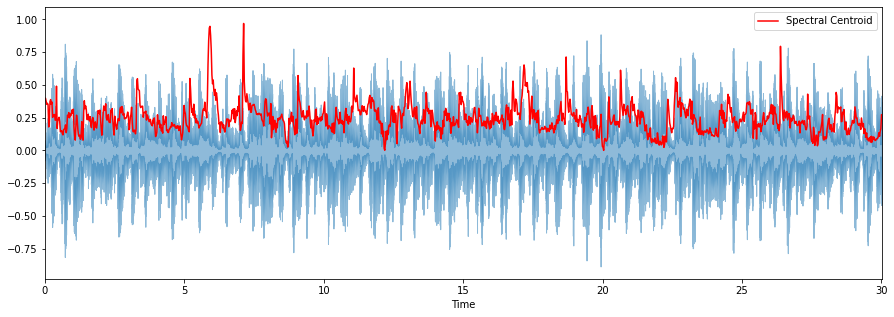

In [66]:
# Frequency Domain Features

# Spectral Centroid

spectralCentroid = librosa.feature.spectral_centroid(x, sr=SR, hop_length=HOP_LEN, n_fft=FRAME_LEN)[0]
print(f"Spectral Centroid - Mean: {np.mean(spectralCentroid)}, Std: {np.std(spectralCentroid)}")

frames = range(len(spectralCentroid))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(15,5))
librosa.display.waveplot(x, sr=SR, alpha=0.5)
plt.plot(t, normalize(spectralCentroid), color='r', label="Spectral Centroid")
plt.legend()
plt.show()

Spectral Bandwith - Mean: 1905.8286480568133, Std: 309.78409983401656


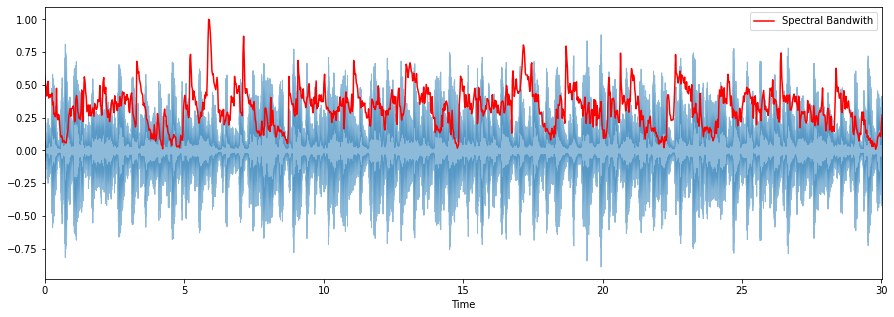

In [71]:
# Spectral Bandwith

spectralBandwith = librosa.feature.spectral_bandwidth(x, sr=SR, hop_length=HOP_LEN, n_fft=FRAME_LEN)[0]
print(f"Spectral Bandwith - Mean: {np.mean(spectralBandwith)}, Std: {np.std(spectralBandwith)}")

frames = range(len(spectralBandwith))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(15,5))
librosa.display.waveplot(x, sr=SR, alpha=0.5)
plt.plot(t, normalize(spectralBandwith), color='r', label="Spectral Bandwith")
plt.legend()
plt.show()

Spectral Contrast Octave 0 - Mean: 7.264080487972782, Std: 4.570597332215044
Spectral Contrast Octave 1 - Mean: 7.747393893807611, Std: 3.2407540834968818
Spectral Contrast Octave 2 - Mean: 11.538027163776851, Std: 4.077203372345507
Spectral Contrast Octave 3 - Mean: 14.085613177090497, Std: 3.8785710904218806
Spectral Contrast Octave 4 - Mean: 16.17747590829824, Std: 4.103259880945279
Spectral Contrast Octave 5 - Mean: 15.581614675893888, Std: 2.955422579373241
Spectral Contrast Octave 6 - Mean: 58.87840392994488, Std: 3.714251620070349


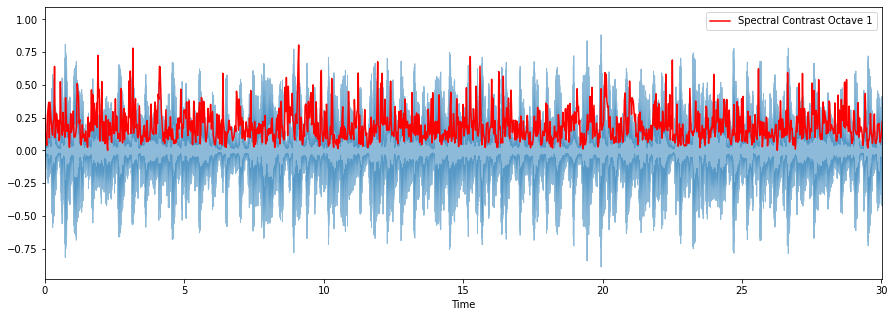

In [83]:
# Spectral Contrast

spectralContrast = librosa.feature.spectral_contrast(x, sr=SR, hop_length=HOP_LEN, n_fft=FRAME_LEN)
for i in range(spectralContrast.shape[0]):
    print(f"Spectral Contrast Octave {i} - Mean: {np.mean(spectralContrast[i])}, Std: {np.std(spectralContrast[i])}")

frames = range(len(spectralContrast[0]))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(15,5))
librosa.display.waveplot(x, sr=SR, alpha=0.5)
plt.plot(t, normalize(spectralContrast[0]), color='r', label="Spectral Contrast Octave 1")
plt.legend()
plt.show()

Spectral Rolloff - Mean: 3493.0585892183876, Std: 992.5983679996141


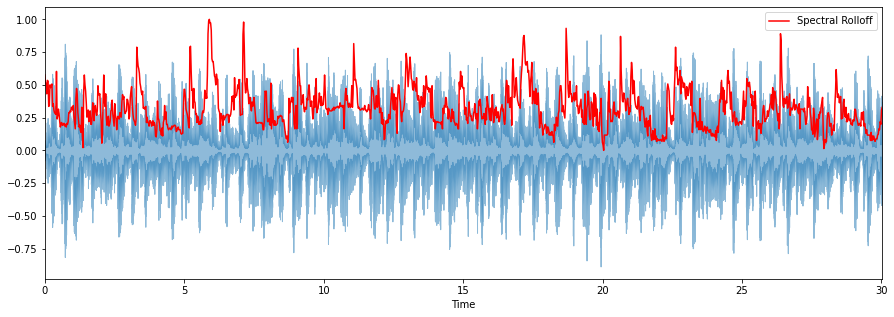

In [88]:
# Spectral Rolloff

spectralRolloff = librosa.feature.spectral_rolloff(x, sr=SR, hop_length=HOP_LEN, n_fft=FRAME_LEN)[0]
print(f"Spectral Rolloff - Mean: {np.mean(spectralRolloff)}, Std: {np.std(spectralRolloff)}")

frames = range(len(spectralRolloff))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(15,5))
librosa.display.waveplot(x, sr=SR, alpha=0.5)
plt.plot(t, normalize(spectralRolloff), color='r', label="Spectral Rolloff")
plt.legend()
plt.show()

Chroma 0 - Mean: 0.5034047961235046, Std: 0.2863510549068451
Chroma 1 - Mean: 0.5139194130897522, Std: 0.28661760687828064
Chroma 2 - Mean: 0.5644146203994751, Std: 0.30014801025390625
Chroma 3 - Mean: 0.4944606125354767, Std: 0.26285964250564575
Chroma 4 - Mean: 0.4931911528110504, Std: 0.2738596796989441
Chroma 5 - Mean: 0.5561935901641846, Std: 0.2953028976917267
Chroma 6 - Mean: 0.5280852317810059, Std: 0.2781469225883484
Chroma 7 - Mean: 0.5281106233596802, Std: 0.31395578384399414
Chroma 8 - Mean: 0.5171414613723755, Std: 0.26918596029281616
Chroma 9 - Mean: 0.564322292804718, Std: 0.28818532824516296
Chroma 10 - Mean: 0.5750007629394531, Std: 0.2872578501701355
Chroma 11 - Mean: 0.5629816651344299, Std: 0.27912405133247375


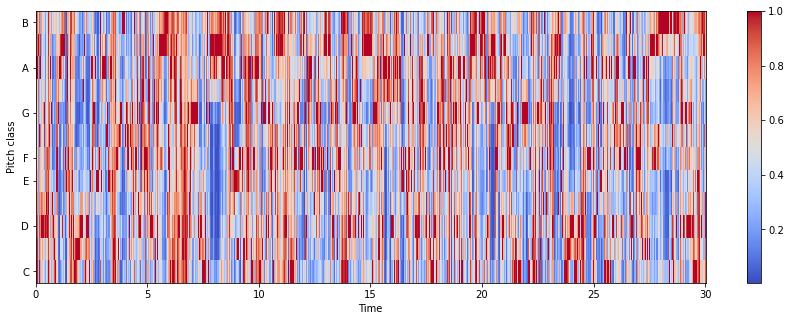

In [108]:
# Chroma

chromagram = librosa.feature.chroma_stft(x, sr=SR, hop_length=HOP_LEN, n_fft=FRAME_LEN)

for i in range(chromagram.shape[0]):
    print(f"Chroma {i} - Mean: {np.mean(chromagram[i])}, Std: {np.std(chromagram[i])}")

plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=HOP_LEN, cmap='coolwarm')
plt.colorbar()
plt.show()

MFCC 0 - Mean: -114.0960464477539, Std: 50.36766052246094
MFCC 1 - Mean: 122.30711364746094, Std: 17.02384376525879
MFCC 2 - Mean: -19.88706398010254, Std: 15.242109298706055
MFCC 3 - Mean: 43.05550765991211, Std: 12.216463088989258
MFCC 4 - Mean: -7.004339694976807, Std: 13.115495681762695
MFCC 5 - Mean: 19.23338508605957, Std: 9.511026382446289
MFCC 6 - Mean: -14.222840309143066, Std: 8.371033668518066
MFCC 7 - Mean: 15.815125465393066, Std: 8.418245315551758
MFCC 8 - Mean: -12.669553756713867, Std: 9.182168960571289
MFCC 9 - Mean: 11.276423454284668, Std: 8.071297645568848
MFCC 10 - Mean: -8.541566848754883, Std: 7.989314079284668
MFCC 11 - Mean: 8.943137168884277, Std: 7.208474636077881
MFCC 12 - Mean: -3.72139573097229, Std: 6.475648403167725
MFCC 13 - Mean: 5.696801662445068, Std: 6.3974833488464355
MFCC 14 - Mean: -5.022589683532715, Std: 7.060040473937988
MFCC 15 - Mean: 0.537887454032898, Std: 7.24239444732666
MFCC 16 - Mean: -1.4039585590362549, Std: 6.032928943634033
MFCC 17

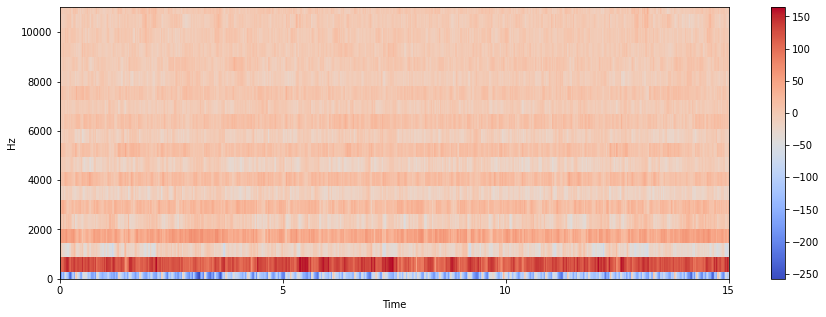

In [109]:
# Mel-Frequency Cepstral Coefficients (MFCC)

mfcc = librosa.feature.mfcc(x, sr=SR)
for i in range(mfcc.shape[0]):
    print(f"MFCC {i} - Mean: {np.mean(mfcc[i])}, Std: {np.std(mfcc[i])}")

plt.figure(figsize=(15,5))
librosa.display.specshow(mfcc, sr=SR, x_axis='time',y_axis='hz', hop_length=HOP_LEN, cmap='coolwarm')
plt.colorbar()
plt.show()


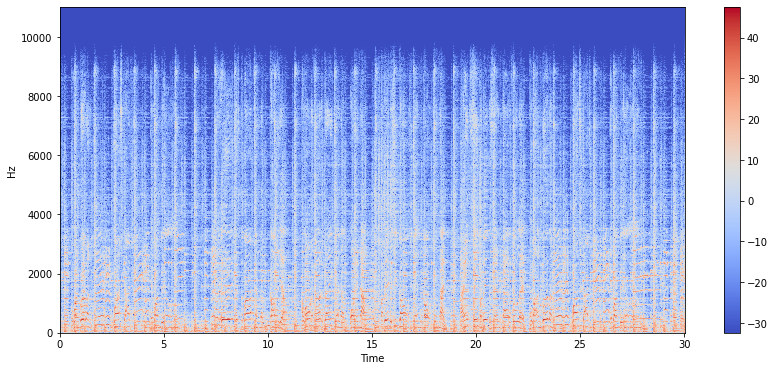

In [106]:
stft = librosa.stft(x)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()